In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


Вырезание изображение листьев со скана:

In [ ]:
import os
import cv2
import numpy as np

# Путь к папке с изображениями
image_folder = '/content/drive/MyDrive/крапива&улитки/фотографии листьев перед закладкой/белый эксперимент/7 аквариум'

# Создание папки для сохранения выделенных объектов
output_folder = '/content/drive/MyDrive/крапива&улитки/фотографии листьев перед закладкой/белый эксперимент/вырезанные'
os.makedirs(output_folder, exist_ok=True)

# Параметры алгоритма сегментации
threshold_value = 12

# Перебор изображений в папке
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.jpeg'):
        image_path = os.path.join(image_folder, filename)
        # Загрузка изображения
        image = cv2.imread(image_path)

        # Конвертируем изображение в оттенки серого и применяем бинаризацию
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        ret, thresh = cv2.threshold(gray, threshold_value, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Ищем контуры объектов на изображении
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

        min_area = 50000  # Минимальная площадь для сохранения контура
        filtered_contours = [cnt for cnt in contours if cv2.contourArea(cnt) > min_area]

        # Выделение объектов и сохранение на отдельных изображениях
        for i, contour in enumerate(filtered_contours):
            # Создание пустого изображения с белым фоном размером маски
            x, y, w, h = cv2.boundingRect(contour)
            object_image = np.ones((h, w, 3), dtype=np.uint8) * 255

            # Создание маски контура
            mask = np.zeros((h, w), dtype=np.uint8)
            contour_offset = contour - np.array([[x, y]])
            cv2.drawContours(mask, [contour_offset], -1, (255), thickness=cv2.FILLED)

            # Применение маски на изображение
            object_pixels = cv2.bitwise_and(image[y:y+h, x:x+w], image[y:y+h, x:x+w], mask=mask)

            # Копирование объекта на пустое изображение с белым фоном
            object_image[mask == 255] = object_pixels[mask == 255]

            # Сохранение изображения с объектом на белом фоне
            object_filename = f'{filename}_object_{i}.jpg'
            object_filepath = os.path.join(output_folder, object_filename)
            cv2.imwrite(object_filepath, object_image)

            # Вывод площади контура
            contour_area = cv2.contourArea(contour)
            print(f"{filename}_object_{i}: {contour_area};")

Поворот изображений:

In [ ]:
from PIL import Image, ImageDraw
import os

# путь к папке с изображениями
image_folder = "/content/drive/MyDrive/Самраб Пролесник/Нейросеть/исходные/Исходные листья1"

# проходимся по каждому файлу в папке
for filename in os.listdir(image_folder):
    # проверяем, является ли файл изображением
    if filename.endswith(".jpg") or filename.endswith(".png"):
        # открываем изображение
        image = Image.open(os.path.join(image_folder, filename))

        # поворачиваем изображение на 90 градусов
        rotated_image = image.rotate(90, expand = True)
        # сохраняем повернутое изображение в ту же папку
        rotated_image.save(os.path.join(image_folder, f"{filename.split('.')[0]}_rotated_90.jpg"))

Создание искусственных погрызов на изображении:

In [ ]:
from PIL import Image, ImageDraw
import os
import random

def add_random_circles_to_image(image):
    # Создаем объект для рисования на изображении
    draw = ImageDraw.Draw(image)

    num_groups = random.randint(2, 5)
    for i in range(num_groups):
        # Выбираем случайную точку на изображении
        x = random.randint(0, image.width)
        y = random.randint(0, image.height)

        # Выбираем случайный радиус для этой группы кругов
        radius = random.randint(20, 150)

        # Генерируем несколько кругов в пределах этого радиуса
        num_circles = random.randint(3, 6)
        for j in range(num_circles):
          point_x = random.randint(x-radius, x+radius)
          point_y = random.randint(y-radius, y+radius)
          # Выбираем случайный радиус для каждого круга в группе
          circle_radius = random.randint(10, int(radius*2/3))

          # Рисуем круг
          draw.ellipse((point_x-circle_radius, point_y-circle_radius, point_x+circle_radius, point_y+circle_radius), fill=(255, 255, 255))

    return image

def add_random_circles_to_folder(input_folder, output_folder):
    # Создаем выходную папку, если она не существует
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Обходим все файлы во входной папке
    for filename in os.listdir(input_folder):
        # Игнорируем файлы, которые не являются изображениями
        if not filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue

        # Открываем изображение
        with Image.open(os.path.join(input_folder, filename)) as image:
            # Добавляем случайные круги на изображение
            image_with_circles = add_random_circles_to_image(image)

            # Сохраняем измененное изображение в выходную папку
            new_filename = os.path.join(output_folder, filename)
            image_with_circles.save(new_filename)

if __name__ == '__main__':
    input_folder = "/content/drive/MyDrive/Самраб Пролесник/Нейросеть/исходные/Исходные листья1"
    output_folder = "/content/drive/MyDrive/Самраб Пролесник/Нейросеть/искусств/Искуственно погрызенные"



In [ ]:
from PIL import Image, ImageDraw
import os
import random
import math

def add_random_circles_to_image(image):
    # Создаем объект для рисования на изображении
    draw = ImageDraw.Draw(image)

    num_groups = random.randint(1, 3)
    for i in range(num_groups):
        # Выбираем случайную точку на изображении
        x = random.randint(0, image.width)
        y = random.randint(0, image.height)

        # Выбираем случайный радиус для этой группы кругов
        radius = random.randint(1, 10)
        draw.ellipse((x-radius, y-radius, x+radius, y+radius), fill=(255, 255, 255))

        # Генерируем несколько кругов в пределах этого радиуса
        num_circles = random.randint(1, 10)
        for i in range(num_circles):
          # Выбираем случайный угол для точки
          angle = random.uniform(0, 2*math.pi)
          # Вычисляем координаты точки на радиусе
          point_x = x + int(radius * math.cos(angle))
          point_y = y + int(radius * math.sin(angle))
          # Выбираем случайный радиус для круга
          circle_radius = random.randint(1, 10)

          # Рисуем круг
          draw.ellipse((point_x-circle_radius, point_y-circle_radius, point_x+circle_radius, point_y+circle_radius), fill=(255, 255, 255))

    return image

def add_random_circles_to_folder(input_folder, output_folder):
    # Создаем выходную папку, если она не существует
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Обходим все файлы во входной папке
    for filename in os.listdir(input_folder):
        # Игнорируем файлы, которые не являются изображениями
        if not filename.endswith(('.jpg', '.jpeg', '.png', '.bmp', '.gif')):
            continue

        # Открываем изображение
        with Image.open(os.path.join(input_folder, filename)) as image:
            # Добавляем случайные круги на изображение
            image_with_circles = add_random_circles_to_image(image)

            # Сохраняем измененное изображение в выходную папку
            new_filename = os.path.join(output_folder, filename)
            image_with_circles.save(new_filename)

if __name__ == '__main__':
    input_folder = ''
    output_folder = ''
    add_random_circles_to_folder(input_folder, output_folder)

FileNotFoundError: ignored

Создание датасета

In [ ]:
import os
import torch
from PIL import Image
import numpy as np
import cv2
import torchvision.transforms as transforms
import torchvision.datasets as datasets

def load_image(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return transforms.Compose([transforms.ToTensor(), transforms.Resize((224, 224), antialias=True)])(img)

def binarize_image(tensor_image, threshold=190):
    grayscale_image = tensor_image.mean(dim=0, keepdim=True)
    grayscale_image = (grayscale_image * 255).numpy()
    binarized_image = (grayscale_image > threshold).astype(np.uint8)
    return torch.from_numpy(binarized_image).float()

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, folder1, folder2):
        self.folder1 = folder1
        self.folder2 = folder2
        self.filenames = self.get_filenames(folder1)

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, index):
        filename = self.filenames[index]
        img1_path = os.path.join(self.folder1, filename)
        img2_path = os.path.join(self.folder2, filename)
        img1 = load_image(img1_path)
        img2 = load_image(img2_path)
        img2_binarized = binarize_image(img2)
        return (img1, img2_binarized)

    def get_filenames(self, folder):
        filenames = []
        for root, dirs, files in os.walk(folder):
            for file in files:
                if os.path.isfile(os.path.join(root, file)):
                    filenames.append(os.path.relpath(os.path.join(root, file), folder))
        return filenames

dataset = CustomDataset('/content/drive/MyDrive/Самраб Пролесник/Нейросеть/искусств погрыз/сильно погрыз', '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/исходные/Исходные листья1')
dataset_test = CustomDataset('/content/drive/MyDrive/Самраб Пролесник/Нейросеть/искусств погрыз/Искусственно погрызенные', '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/исходные/Исходные листья1')

In [ ]:
from torch.utils.data import DataLoader

train_loader = DataLoader(dataset, batch_size=8, shuffle=False)
test_loader = DataLoader(dataset_test, batch_size=8, shuffle=False)
print(len(train_loader), len(test_loader))

45 45


In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (32, 1)


def show(batch, cols=16):
    cols = min(cols, len(batch))
    img_grid = make_grid(batch[:cols], padding=10, nrow=cols)
    plt.figure(figsize=(cols, 1))
    plt.axis("off")
    plt.imshow(np.transpose(img_grid.numpy(), (1, 2, 0)))


images, masks = iter(dataset[50])

show(images)
show(masks)

In [1]:
!pip install segmentation-models-pytorch

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.7/106.7 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.9 MB/s eta 0:00:00
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16427 sha256=cc0f38acbe8983ec257ecd9fa40c25ff9add0bc01c862cd2097bd3ec2c5b38ca
  Stored in directory: /root/.cache/pip/wheels/03/3f/e9/911b1bc46869644912bda90a56bcf7b960f20b5187feea3baf
  Created wheel for pretrainedmodels: filename=pretrainedmodels-0.7.4-py3-none-any.whl size=60945 sha256=f93d64d0ea49428c888d90663b33376eb4bffa21bd67dc841684cb24a37c4f8c
  Stored in directory: /root/.cache/pip/wheels/35/cb/a5/8f534c6

In [ ]:
import torch
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
import segmentation_models_pytorch as smp
import torch.optim as optim
import torch.nn as nn

model = smp.UnetPlusPlus(encoder_name="efficientnet-b0", classes = 1, activation = "sigmoid")
criterion =  smp.losses.FocalLoss('binary')
model.to(device)
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)

In [ ]:
import segmentation_models_pytorch as smp
import torch
import torch.optim as optim
import torch.nn as nn

model = smp.UnetPlusPlus(encoder_name="efficientnet-b0", classes = 1, activation = "sigmoid")
# model.load_state_dict(torch.load("/content/drive/MyDrive/нейросеть/leaves/SMP_dataset2_UnetPlusPlus_FocalLoss.pth"))
model.load_state_dict(torch.load("/content/drive/MyDrive/Самраб Пролесник/Нейросеть/mercurialis.pth"))
criterion =  smp.losses.FocalLoss('binary')
optimizer = optim.AdamW(model.parameters(), lr=0.0001, weight_decay=1e-4)
model.to(device)

UnetPlusPlus(
  (encoder): EfficientNetEncoder(
    (_conv_stem): Conv2dStaticSamePadding(
      3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False
      (static_padding): ZeroPad2d((0, 1, 0, 1))
    )
    (_bn0): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
    (_blocks): ModuleList(
      (0): MBConvBlock(
        (_depthwise_conv): Conv2dStaticSamePadding(
          32, 32, kernel_size=(3, 3), stride=[1, 1], groups=32, bias=False
          (static_padding): ZeroPad2d((1, 1, 1, 1))
        )
        (_bn1): BatchNorm2d(32, eps=0.001, momentum=0.010000000000000009, affine=True, track_running_stats=True)
        (_se_reduce): Conv2dStaticSamePadding(
          32, 8, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_se_expand): Conv2dStaticSamePadding(
          8, 32, kernel_size=(1, 1), stride=(1, 1)
          (static_padding): Identity()
        )
        (_project_conv): Conv2dStaticSam

In [ ]:
def train(model, criterion, optimizer, epoch=None, masks_in_progress=[]):
    ep_loss = 0
    model.train()
    for img_batch, masks_batch in train_loader:
        optimizer.zero_grad()
        output = model(img_batch.to(device))
        loss = criterion(output, masks_batch.to(device))
        loss.backward()
        optimizer.step()
        ep_loss += loss.item()

    val_loss = 0
    for i, batch in enumerate(test_loader):
        with torch.no_grad():
            img_batch, masks_batch = batch
            output = model(img_batch.to(device))
            loss = criterion(output, masks_batch.to(device))
            val_loss += loss.item()
            if i == 0:
                masks_in_progress.append(output[1].cpu())

    print(
        "Epoch {} Train loss {:.2f} Val loss {:.2f}".format(
            epoch, ep_loss / len(train_loader), val_loss / len(test_loader)
        )
    )

In [ ]:
import os

def compare_folders(folder1, folder2):
    files1 = set(os.listdir(folder1))
    files2 = set(os.listdir(folder2))

    differences = files1.symmetric_difference(files2)

    if len(differences) == 0:
        print("Нет различий между папками.")
    else:
        print("Несоответствия в названиях файлов:")
        for file in differences:
            if file in files1:
                print(f"В папке {folder1}: {file}")
            else:
                print(f"В папке {folder2}: {file}")



compare_folders('/content/drive/MyDrive/Notes/ЗБС/Самраб Пролесник/Нейросеть/искусств погрыз/Искусственно погрызенные', '/content/drive/MyDrive/Notes/ЗБС/Самраб Пролесник/Нейросеть/исходные/Исходные листья1')


In [ ]:
%%time
masks_in_progress = []
for epoch in range(1):
  train(model, criterion, optimizer, epoch, masks_in_progress)

torch.save(model.state_dict(), "/content/drive/MyDrive/Notes/ЗБС/Самраб Пролесник/Нейросеть/Mercury1.pth")

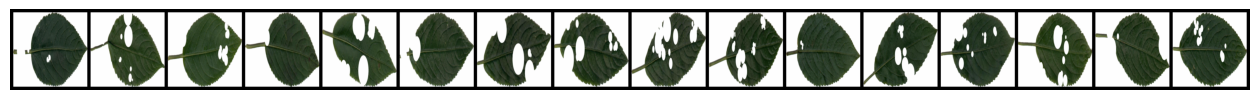

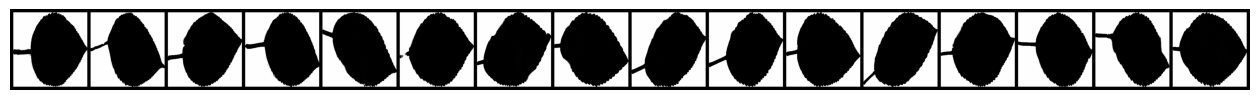

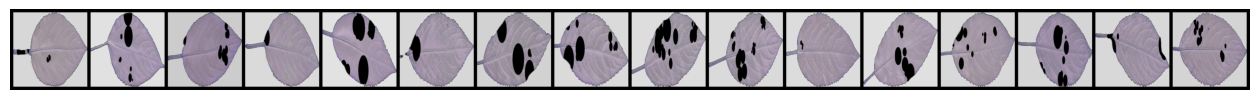

In [ ]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np

def show(batch, cols=16, max_size=256):
    cols = min(cols, len(batch))
    img_grid = make_grid(batch[:cols], padding=10, nrow=cols, normalize=True, scale_each=True, max_size=max_size)
    plt.figure(figsize=(cols, cols))
    plt.axis("off")
    plt.imshow(np.transpose(img_grid.cpu().numpy(), (1, 2, 0)))


def show_valset_pred(model, cols=16):
    images, pred_masks = [], []
    for batch in dataset_test:
        with torch.no_grad():
            img, mask = batch
            images.append(img)
            output = model(img.unsqueeze(0).to(device)).squeeze()
            pred_masks.append(output.cpu())
    show(torch.stack(images)[:cols, ...])
    show(torch.stack(pred_masks).unsqueeze(1)[:cols, ...])
    show(torch.stack(pred_masks).unsqueeze(1)[:cols, ...] - torch.stack(images)[:cols, ...])


show_valset_pred(model)

In [ ]:
def show(batch, cols=16, max_size=256):
    cols = min(cols, len(batch))
    img_grid = make_grid(batch[:cols], padding=10, nrow=cols, normalize=True, scale_each=True, max_size=max_size)
    plt.figure(figsize=(cols, cols))
    plt.axis("off")
    plt.imshow(np.transpose(img_grid.cpu().numpy(), (1, 2, 0)))

In [ ]:

from torchvision.utils import make_grid
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
import os
import torch
from PIL import Image
import numpy as np
import cv2
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.utils as utils

def normalize(img):
  img_min = img.min()
  img_max = img.max()
  return (img - img_min) / (img_max - img_min)

def binarize_image(tensor_image, threshold=0.5):
    tensor_image = normalize(tensor_image)
    #grayscale_image = 0.299 * tensor_image[0:1, ...] + 0.587 * tensor_image[1:2, ...] + 0.114 * tensor_image[2:3, ...]
    grayscale_image = tensor_image.mean(dim=0, keepdim=True)
    grayscale_image = (grayscale_image).numpy()
    binarized_image = (grayscale_image > threshold).astype(np.uint8)
    return torch.from_numpy(binarized_image).float()

def load_image(path):
    with open(path, 'rb') as f:
        img = Image.open(f)
        return transforms.Compose([ transforms.ToTensor(), transforms.Resize((224, 224))])(img)

class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, folder1):
        self.folder1 = folder1
        self.filenames = [f for f in os.listdir(folder1)][1500:2000]  # Take only the first 500 filenames
        self.file_names = sorted(self.filenames)  # Sort the filenames

    def __len__(self):
        return len(self.filenames)

    def __getitem__(self, index):
        filename = self.filenames[index]
        img1_path = os.path.join(self.folder1, filename)
        img1 = load_image(img1_path)
        return img1

    def get_file_name(self, index):
        return self.file_names[index]

true_test = CustomDataset('/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Контуры погрыз.')




In [ ]:
import os

def count_files_in_folder(folder_path):
    file_count = 0
    for _, _, files in os.walk(folder_path):
        file_count += len(files)
    return file_count

folder_path = '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Контуры погрыз.'
num_files = count_files_in_folder(folder_path)
print("Число файлов в папке:", num_files)


Число файлов в папке: 1394


In [ ]:
for i in range(len(true_test)):
    file_name = true_test.get_file_name(i)
    print(file_name)

In [ ]:
def show_valset_pred(model, cols=16):
    images, pred_masks = [], []
    for i, batch in enumerate(true_test):
            img = batch
            images.append(binarize_image(img.unsqueeze(0), 0.6))
            #utils.save_image(img, f'/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Восстановленные для презы/лист_{i}.png')
            output = model(img.unsqueeze(0).to(device))
            pred_masks.append(output.cpu())
    #utils.save_image(torch.stack(images).squeeze()[:cols, ...], '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Восстановленные для презы/лист.png')
    #utils.save_image(torch.stack(pred_masks).squeeze(1)[:cols, ...], '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Восстановленные для презы')
    #utils.save_image(torch.stack(pred_masks).squeeze(1)[:cols, ...] - torch.stack(images).squeeze()[:cols, ...], '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Восстановленные для презы')
    show(torch.stack(images).squeeze()[:cols, ...])
    show(torch.stack(pred_masks).squeeze(1)[:cols, ...])
    show(torch.stack(pred_masks).squeeze(1)[:cols, ...] - torch.stack(images).squeeze()[:cols, ...])

show_valset_pred(model)

In [ ]:
import os
from PIL import Image

folder = '/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Контуры погрыз.'
image_sizes = []

for filename in os.listdir(folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):
        filepath = os.path.join(folder, filename)
        with Image.open(filepath) as img:
            image_sizes.append(img.size)

image_sizes = [(y, x) for x, y in image_sizes]

import torch




def resize_images(images, sizes):
    resized_images = []
    for img, size in zip(images, sizes):
        resized_img = torch.nn.functional.interpolate(img, size=size, mode='bilinear', align_corners=False)
        resized_images.append(resized_img)
    return resized_images

images, pred_masks = [], []
for batch in true_test:
    with torch.no_grad():
        img = batch
        images.append(binarize_image(img, 0.6).unsqueeze(0))
        output = model(img.unsqueeze(0).to(device))
        pred_masks.append(output.cpu())

resized_images = resize_images(images, image_sizes[1000:1500])
resized_masks = resize_images(pred_masks, image_sizes[1000:1500])

def subtract_tensor_lists(list1, list2):
    result = []
    for t1, t2 in zip(list1, list2):
        subtracted_tensor = binarize_image(t1 - t2, 0.05)
        result.append(subtracted_tensor.squeeze())
    return result

# Выполняем операцию вычитания одного списка из другого
subtracted_list = subtract_tensor_lists(resized_masks, resized_images)

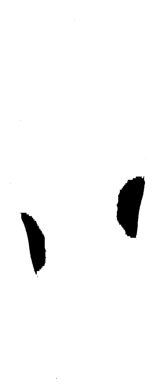

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(subtracted_list[9], cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np

def count_black_pixels(image_tensor):
    # Преобразуем тензор в массив NumPy
    image_array = np.array(image_tensor)

    # Подсчитываем количество черных пикселей
    num_black_pixels = np.sum(image_array == 0)

    return num_black_pixels

square  = []
for tensor in subtracted_list:
  square.append(count_black_pixels(tensor))

print(square)

[6064, 2512, 4485, 9754, 5431, 2850, 2732, 1174, 400, 1060, 1708, 918, 4462, 8864, 1543, 2057, 5103, 10327, 1429, 2603092, 1747, 1900, 7436, 5771, 6129, 12305, 27885, 37505, 30344, 17663, 2367, 2224, 1809, 420, 11532, 22111, 26439, 697914, 7156, 453, 7855, 636, 778, 2058, 2765, 19, 5146, 2641, 1092, 1283261, 200, 1010, 1853, 3712, 3983, 47286, 5239, 26, 171, 128, 451, 1171, 10266, 1758, 674, 1195, 10266, 1406, 7310, 49, 3130, 5579, 2616, 5218, 6669, 49, 3130, 5980, 2857, 5417, 10846, 6917, 505, 2005, 6272, 904, 3348, 1926638, 9927, 7460, 533, 2062, 6395, 870, 3839, 1867602, 10846, 7666, 505, 1615, 6750, 2309, 3624, 1926638, 3872, 2845, 300, 4136, 1046, 1186, 2604, 3420, 3032, 562, 2537, 1205, 1085, 2900, 3446, 2892, 328, 2537, 886, 2271, 4136, 609, 2484, 1690, 713, 2096, 1389, 2311, 63, 129, 23, 321, 2933, 857, 911, 4429, 3547, 5097, 2547, 936, 911, 2386, 1999, 5097, 4094, 3212, 12433, 2266, 710, 31, 38, 1874, 1759, 1711, 1484, 6995, 6381, 1195, 858, 1711, 743, 6017, 5574, 986, 780, 38

TypeError: ignored

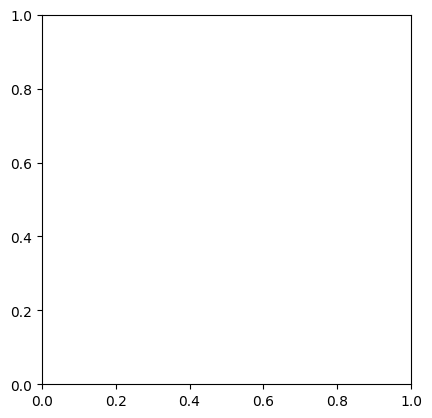

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(resized_masks[9].squeeze(0), cmap='gray')
plt.axis('off')
plt.show()

In [ ]:
import os
from PIL import Image

def count_black_pixels(image_path):
    # Открываем изображение и преобразуем его в черно-белое
    image = Image.open(image_path).convert("L")

    # Применяем бинаризацию с помощью порогового значения
    threshold = 128
    binary_image = image.point(lambda x: 0 if x < threshold else 255, "1")

    # Подсчитываем количество черных пикселей
    black_pixels = sum(1 for pixel in binary_image.getdata() if pixel == 0)

    return black_pixels

def process_images(folder_path):
    # Перебираем все файлы в указанной папке
    for filename in os.listdir(folder_path):
        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)

            # Вызываем функцию для подсчета черных пикселей
            black_pixel_count = count_black_pixels(image_path)

            # Выводим название файла и количество черных пикселей
            print(f"File: {filename}, Black Pixels: {black_pixel_count}")

# Указываем путь к папке с изображениями
folder_path = "/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Контуры погрыз."

# Вызываем функцию для обработки изображений
process_images(folder_path)


File: 36.jpg_object_3.jpg, Black Pixels: 230451
File: 83.jpeg_object_0.jpg, Black Pixels: 254859
File: 83.jpeg_object_1.jpg, Black Pixels: 346760
File: 82.jpeg_object_0.jpg, Black Pixels: 161812
File: 82.jpeg_object_1.jpg, Black Pixels: 226583
File: 82.jpeg_object_2.jpg, Black Pixels: 337416
File: 82.jpeg_object_3.jpg, Black Pixels: 317796
File: 82.jpeg_object_4.jpg, Black Pixels: 298818
File: 82.jpeg_object_5.jpg, Black Pixels: 327856
File: 126.jpg_object_0.jpg, Black Pixels: 533641
File: 126.jpg_object_1.jpg, Black Pixels: 508495
File: 126.jpg_object_2.jpg, Black Pixels: 388215
File: 126.jpg_object_3.jpg, Black Pixels: 523123
File: 163.jpeg_object_0.jpg, Black Pixels: 198524
File: 163.jpeg_object_1.jpg, Black Pixels: 170019
File: 163.jpeg_object_2.jpg, Black Pixels: 149141
File: 163.jpeg_object_3.jpg, Black Pixels: 163523
File: 163.jpeg_object_4.jpg, Black Pixels: 205782
File: 125.jpg_object_0.jpg, Black Pixels: 453512
File: 125.jpg_object_1.jpg, Black Pixels: 419006
File: 125.jpg_ob

In [ ]:
import os
from PIL import Image

def count_black_pixels(image_path):
    # Открываем изображение и преобразуем его в черно-белое
    image = Image.open(image_path).convert("L")

    # Применяем бинаризацию с помощью порогового значения
    threshold = 128
    binary_image = image.point(lambda x: 0 if x < threshold else 255, "1")

    # Подсчитываем количество черных пикселей
    black_pixels = sum(1 for pixel in binary_image.getdata() if pixel == 0)

    return binary_image, black_pixels

def process_images(folder_path):
    # Перебираем все файлы в указанной папке
    image_count = 0
    for filename in os.listdir(folder_path):
        if image_count >= 10:
            break

        if filename.endswith(".png") or filename.endswith(".jpg"):
            image_path = os.path.join(folder_path, filename)

            # Вызываем функцию для подсчета черных пикселей и получения бинаризованного изображения
            binary_image, black_pixel_count = count_black_pixels(image_path)

            # Выводим название файла и количество черных пикселей
            print(f"File: {filename}, Black Pixels: {black_pixel_count}")

            if image_count < 10:
                # Выводим изображение до и после бинаризации
                print("Image Before Binarization:")
                Image.open(image_path).show()

                print("Image After Binarization:")
                binary_image.show()

            image_count += 1

# Указываем путь к папке с изображениями
folder_path = "/content/drive/MyDrive/Самраб Пролесник/Нейросеть/Контуры погрыз."

# Вызываем функцию для обработки изображений
process_images(folder_path)



Output hidden; open in https://colab.research.google.com to view.